R-squared value (scaled): 0.908977033044471
均方差 (scaled): 0.006449719371983722
預測信用卡金額:
     年份  月份       預測信用卡金額
0  2023  10  1.804881e+11
1  2023  11  1.866726e+11
2  2023  12  1.935430e+11


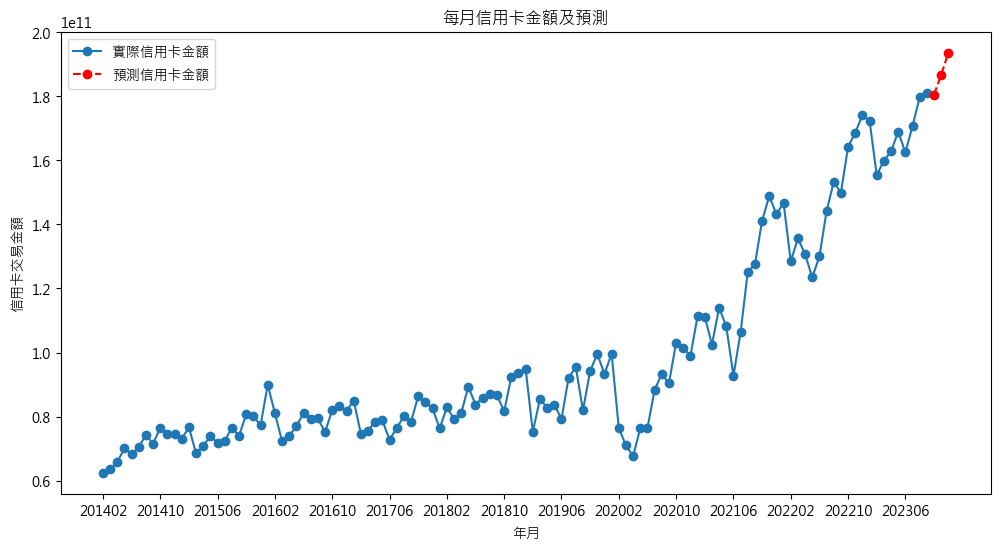

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

df = pd.read_csv("./processed_dataset.csv")

df["年月"] = pd.to_datetime(df["年"].astype(str) + df["月"].astype(str), format="%Y%m")
df["年月"] = df["年月"].dt.strftime("%Y%m")

# 按照年月分组，計算每年各個月份的信用卡消費金額
monthly_total_expenses = df.groupby(["年月"])["信用卡交易金額[新台幣]"].sum().reset_index()

# 移除第一個月
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 轉 datetime 取出年份和月份
monthly_total_expenses["年份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.year
monthly_total_expenses["月份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.month

X = monthly_total_expenses[["年份", "月份"]].astype(float)
y = monthly_total_expenses["信用卡交易金額[新台幣]"]

# 多項式特徵轉換
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months = pd.DataFrame({"年份": [2023] * 3, "月份": [10, 11, 12]})
next_months_poly = poly.transform(next_months)

# 將預測的信用卡金額合併至DataFrame
next_months["預測信用卡金額"] = model.predict(next_months_poly)

# 特徵縮放(MinMaxScaler)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 建立多項式迴歸模型
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months_scaled = scaler_X.transform(next_months_poly)
next_months["預測信用卡金額_scaled"] = scaler_y.inverse_transform(
    model_scaled.predict(next_months_scaled).reshape(-1, 1)
).flatten()

r_squared_scaled = r2_score(y_scaled, model_scaled.predict(X_scaled))
print(f"R-squared value (scaled): {r_squared_scaled}")
mse_scaled = mean_squared_error(y_scaled, model_scaled.predict(X_scaled))
print(f"均方差 (scaled): {mse_scaled}")

print("預測信用卡金額:")
print(next_months[["年份", "月份", "預測信用卡金額"]])

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_expenses["年月"], y, marker="o", label="實際信用卡金額")
plt.plot(
    next_months["年份"].astype(str) + next_months["月份"].astype(str).str.zfill(2),
    next_months["預測信用卡金額"],
    marker="o",
    linestyle="--",
    color="red",
    label="預測信用卡金額",
)
plt.title("每月信用卡金額及預測")
plt.xlabel("年月")
plt.ylabel("信用卡交易金額")
plt.xticks(monthly_total_expenses["年月"][::8])  # 每8個標籤顯示一次
plt.legend()
plt.show()

# 正式版

R-squared value: 0.9089770330444744
均方差: 0.006449719371983477
預測信用卡金額:
     年份  月份       預測信用卡金額
0  2023  10  1.804881e+11
1  2023  11  1.866726e+11
2  2023  12  1.935430e+11


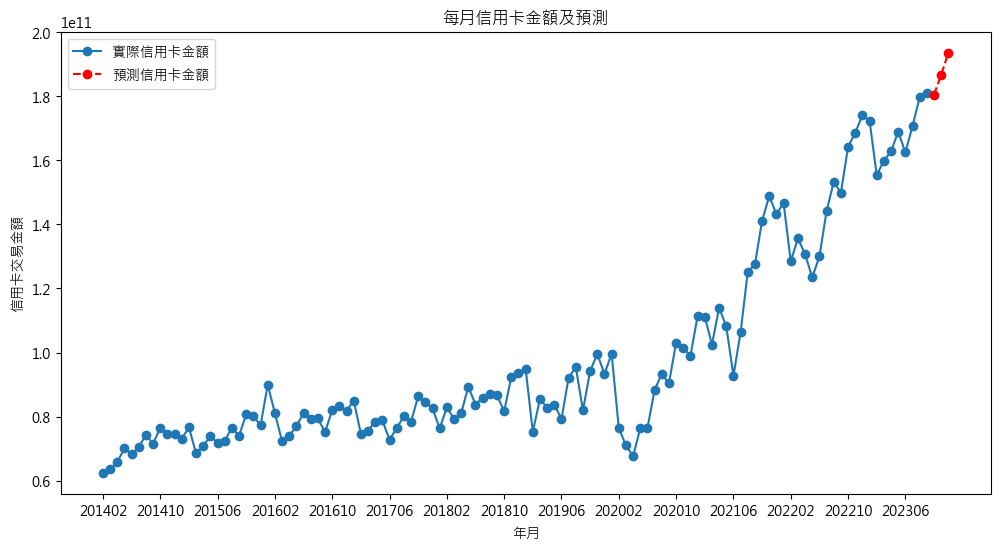

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

df = pd.read_csv("./processed_dataset.csv")

df["年月"] = pd.to_datetime(df["年"].astype(str) + df["月"].astype(str), format="%Y%m")
df["年月"] = df["年月"].dt.strftime("%Y%m")

# 按照年月分组，計算每年各個月份的信用卡消費金額
monthly_total_expenses = df.groupby(["年月"])["信用卡交易金額[新台幣]"].sum().reset_index()

# 移除第一個月
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 轉 datetime 取出年份和月份
monthly_total_expenses["年份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.year
monthly_total_expenses["月份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.month

X = monthly_total_expenses[["年份", "月份"]].astype(float)
y = monthly_total_expenses["信用卡交易金額[新台幣]"]

# 多項式特徵轉換
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# 特徵縮放(MinMaxScaler)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 建立多項式迴歸模型
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months = pd.DataFrame({"年份": [2023] * 3, "月份": [10, 11, 12]})
next_months_poly = poly.transform(next_months)
next_months_scaled = scaler_X.transform(next_months_poly)

# 將預測的信用卡金額合併至DataFrame
next_months["預測信用卡金額"] = scaler_y.inverse_transform(
    model.predict(next_months_scaled).reshape(-1, 1)
).flatten()

# 計算模型的性能指標
r_squared = r2_score(y_scaled, model.predict(X_scaled))
print(f"R-squared value: {r_squared}")
mse = mean_squared_error(y_scaled, model.predict(X_scaled))
print(f"均方差: {mse}")

print("預測信用卡金額:")
print(next_months[["年份", "月份", "預測信用卡金額"]])

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_expenses["年月"], y, marker="o", label="實際信用卡金額")
plt.plot(
    next_months["年份"].astype(str) + next_months["月份"].astype(str).str.zfill(2),
    next_months["預測信用卡金額"],
    marker="o",
    linestyle="--",
    color="red",
    label="預測信用卡金額",
)
plt.title("每月信用卡金額及預測")
plt.xlabel("年月")
plt.ylabel("信用卡交易金額")
plt.xticks(monthly_total_expenses["年月"][::8])  # 每8個標籤顯示一次
plt.legend()
plt.show()

R-squared value (scaled): 0.7175692095098632
均方差 (scaled): 0.020012524328710223
R-squared value (unscaled): 0.7175692095098478
均方差 (unscaled): 2.8152610241548904e+20
預測信用卡金額:
     年份  月份       預測信用卡金額  預測信用卡金額_unscaled
0  2023  10  1.468756e+11      1.468756e+11
1  2023  11  1.482709e+11      1.482709e+11
2  2023  12  1.496662e+11      1.496662e+11


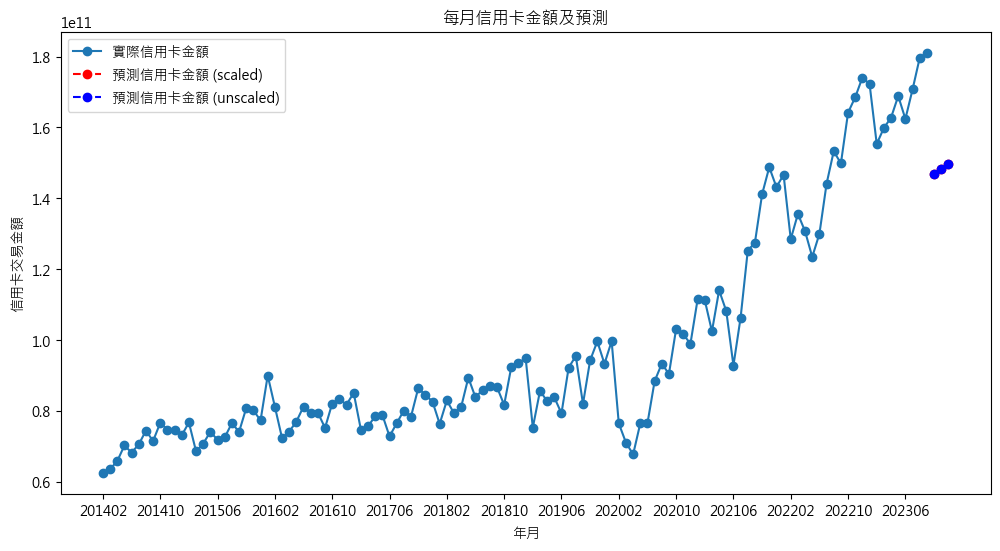

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

df = pd.read_csv("./processed_dataset.csv")

df["年月"] = pd.to_datetime(df["年"].astype(str) + df["月"].astype(str), format="%Y%m")
df["年月"] = df["年月"].dt.strftime("%Y%m")

# 按照年月分组，計算每年各個月份的信用卡消費金額
monthly_total_expenses = df.groupby(["年月"])["信用卡交易金額[新台幣]"].sum().reset_index()

# 移除第一個月
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 轉 datetime 取出年份和月份
monthly_total_expenses["年份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.year
monthly_total_expenses["月份"] = pd.to_datetime(
    monthly_total_expenses["年月"], format="%Y%m"
).dt.month

X = monthly_total_expenses[["年份", "月份"]].astype(float)
y = monthly_total_expenses["信用卡交易金額[新台幣]"]

# 多項式特徵轉換
degree = 1
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months = pd.DataFrame({"年份": [2023] * 3, "月份": [10, 11, 12]})
next_months_poly = poly.transform(next_months)

# 將預測的信用卡金額合併至DataFrame
next_months["預測信用卡金額"] = model.predict(next_months_poly)

# 特徵縮放(MinMaxScaler)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 建立多項式迴歸模型
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

# 預測2023年10月、11月和12月的信用卡消費金額
next_months_scaled = scaler_X.transform(next_months_poly)
next_months["預測信用卡金額_scaled"] = scaler_y.inverse_transform(
    model_scaled.predict(next_months_scaled).reshape(-1, 1)
).flatten()

r_squared_scaled = r2_score(y_scaled, model_scaled.predict(X_scaled))
print(f"R-squared value (scaled): {r_squared_scaled}")
mse_scaled = mean_squared_error(y_scaled, model_scaled.predict(X_scaled))
print(f"均方差 (scaled): {mse_scaled}")

# 計算沒有縮放的模型的性能指標
r_squared_unscaled = r2_score(y, model.predict(X_poly))
print(f"R-squared value (unscaled): {r_squared_unscaled}")
mse_unscaled = mean_squared_error(y, model.predict(X_poly))
print(f"均方差 (unscaled): {mse_unscaled}")

# 輸出沒有縮放的模型預測結果
next_months["預測信用卡金額_unscaled"] = model.predict(next_months_poly)

print("預測信用卡金額:")
print(next_months[["年份", "月份", "預測信用卡金額", "預測信用卡金額_unscaled"]])


plt.figure(figsize=(12, 6))
plt.plot(monthly_total_expenses["年月"], y, marker="o", label="實際信用卡金額")
plt.plot(
    next_months["年份"].astype(str) + next_months["月份"].astype(str).str.zfill(2),
    next_months["預測信用卡金額"],
    marker="o",
    linestyle="--",
    color="red",
    label="預測信用卡金額 (scaled)",
)
plt.plot(
    next_months["年份"].astype(str) + next_months["月份"].astype(str).str.zfill(2),
    next_months["預測信用卡金額_unscaled"],
    marker="o",
    linestyle="--",
    color="blue",
    label="預測信用卡金額 (unscaled)",
)
plt.title("每月信用卡金額及預測")
plt.xlabel("年月")
plt.ylabel("信用卡交易金額")
plt.xticks(monthly_total_expenses["年月"][::8])  # 每8個標籤顯示一次
plt.legend()
plt.show()

相關性矩陣：
                    年月  信用卡交易金額[新台幣]   信用卡交易筆數
年月            1.000000      0.834079  0.874661
信用卡交易金額[新台幣]  0.834079      1.000000  0.971233
信用卡交易筆數       0.874661      0.971233  1.000000


,年月,信用卡交易金額[新台幣],信用卡交易筆數
0,201401,76800411337,32154251
1,201402,62505801850,27209094
2,201403,63526607164,29986574
3,201404,65788821735,29478606
4,201405,70200355390,31625276
...,...,...,...
112,202305,168882656190,150123141
113,202306,162415021002,149092364
114,202307,170739795168,158855792
115,202308,179663600973,159647086


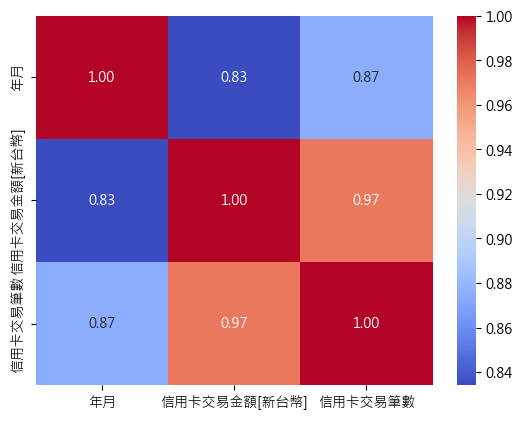

In [5]:
import pandas as pd
import seaborn as sns

# 讀取數據
df = pd.read_csv("./processed_dataset.csv")

# 按照年月分组，計算每年各個月份的信用卡消費金額和交易筆數
monthly_total_expenses = df.groupby(["年月"]).agg({
    "信用卡交易金額[新台幣]": "sum",
    "信用卡交易筆數": "sum"
}).reset_index()

# 計算相關性
correlation_matrix = monthly_total_expenses.corr()

# 打印相關性矩陣
print("相關性矩陣：")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
monthly_total_expenses